<h3>Linear Regression: Weather Dataset

In [1]:
import pandas as pd
import numpy as np

<h3>Importing + Cleaning the Data</h3>

In [2]:
#Read the raw data file
raw_data = pd.read_csv('weather_data_extended.csv')

In [3]:
raw_data.head()

,Location,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
0,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
1,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
2,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
3,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
4,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16


In [4]:
# Data types of each column
raw_data.info()
# Location is an 'object' i.e. likely a string which is incompatiable with linear regression... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          800 non-null    object 
 1   Temperature (°C)  800 non-null    float64
 2   Feels Like (°C)   800 non-null    float64
 3   Humidity (%)      798 non-null    float64
 4   Wind Speed (kph)  798 non-null    float64
 5   Cloud Cover (%)   800 non-null    int64  
 6   Pressure (mb)     798 non-null    float64
 7   UV Index          800 non-null    int64  
 8   Visibility (km)   800 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 56.4+ KB


In [38]:
raw_data.describe()
# Very basic data exploration

,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
count,800.00000,800.000000,798.000000,798.000000,800.000000,798.000000,800.000000,800.000000
mean,16.53750,16.312500,73.379699,16.165664,43.750000,1013.017544,1.750000,10.750000
std,5.58223,7.397601,16.566658,10.333199,34.820297,7.615259,1.090406,1.985555
min,8.30000,4.500000,40.000000,3.600000,0.000000,900.000000,1.000000,10.000000
25%,13.75000,12.375000,65.500000,6.275000,0.000000,1012.000000,1.000000,10.000000
50%,15.50000,15.900000,74.000000,9.000000,62.500000,1013.000000,1.000000,10.000000
75%,20.25000,20.625000,85.750000,24.100000,75.000000,1019.250000,2.250000,10.000000
max,25.00000,27.800000,100.000000,29.900000,75.000000,1024.000000,4.000000,16.000000


In [6]:
#Finding any null values
raw_data.isnull().sum()

Location            0
Temperature (°C)    0
Feels Like (°C)     0
Humidity (%)        2
Wind Speed (kph)    2
Cloud Cover (%)     0
Pressure (mb)       2
UV Index            0
Visibility (km)     0
dtype: int64

In [7]:
#Drop null values (create new variable to distinguish between raw and 'cleaned' data)
data = raw_data.dropna()
data.isnull().sum()
# If there were lots of null values/rows, I would use an imputation method instead of 

Location            0
Temperature (°C)    0
Feels Like (°C)     0
Humidity (%)        0
Wind Speed (kph)    0
Cloud Cover (%)     0
Pressure (mb)       0
UV Index            0
Visibility (km)     0
dtype: int64

In [40]:
# Display the number of unique and duplicate rows in 'data' (no modifications)
unique_rows = data.drop_duplicates().shape[0]
duplicate_rows = len(data) - unique_rows

print(f"Total rows: {len(data)}")
print(f"Unique rows: {unique_rows}")
print(f"'Duplicate' rows: {duplicate_rows}")

# There are so many 'duplicate' values. If they were dropped, there would only be 9 rows to train on?
# Q: Having so many duplicates to train on means that the model is going to be 'innaccurate' when testing 
# different and more varied data sets surely?

# If I were to drop any duplicates:
#data = data.drop_duplicates()

Total rows: 794
Unique rows: 9
'Duplicate' rows: 785


In [44]:
#Converting the location column (strings) into category codes (linear regression can't use non-numerical data)

#How many unique locations?
print(data['Location'].nunique())
print(list(data['Location'].unique()))

#String -> Index (int):
data.loc[:, 'Location_Index'] = data['Location'].astype(dtype='category').cat.codes

8
['New York', 'London', 'Tokyo', 'Paris', 'Sydney', 'Dubai', 'Rome', 'Hong Kong']


In [45]:
data.head()

,Location,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km),Location_Index
0,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
1,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
2,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
3,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
4,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3


<h3>Initial Data Visualisation + Exploratory Data Analysis (EDA)

In [13]:
#Visualisation for exploratory purposes:

In [14]:
#Import the visualisation libraries:
import matplotlib.pyplot as plt
import seaborn as sns

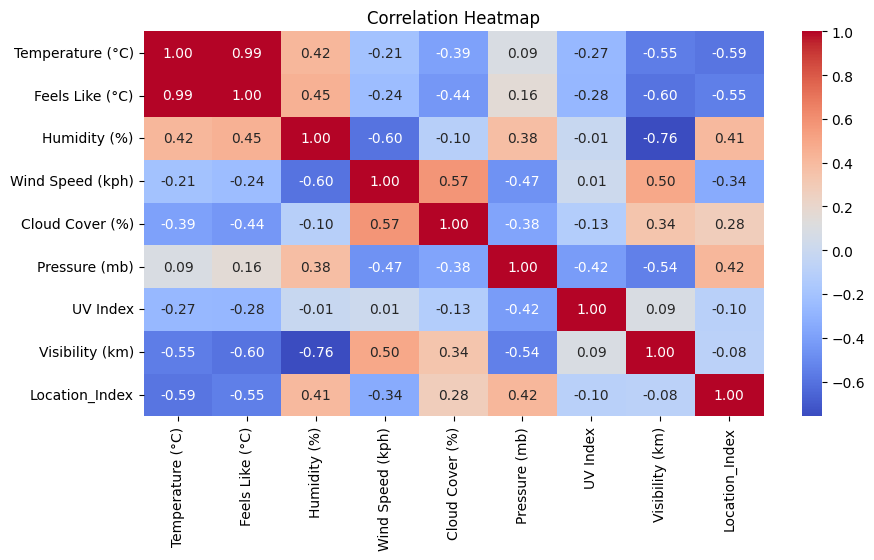

In [15]:
# Correlation matrix

#Need to make sure only numeric data is used (non-numeric data cannot be visualised in a corr matrix):
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(10, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
#Diagonal has to equal 1 beacause it's a measure of a feature's correlation with itself.
#Features such as UV-index & wind speed, and UV-index & humidity show very little correlation (close to 0)

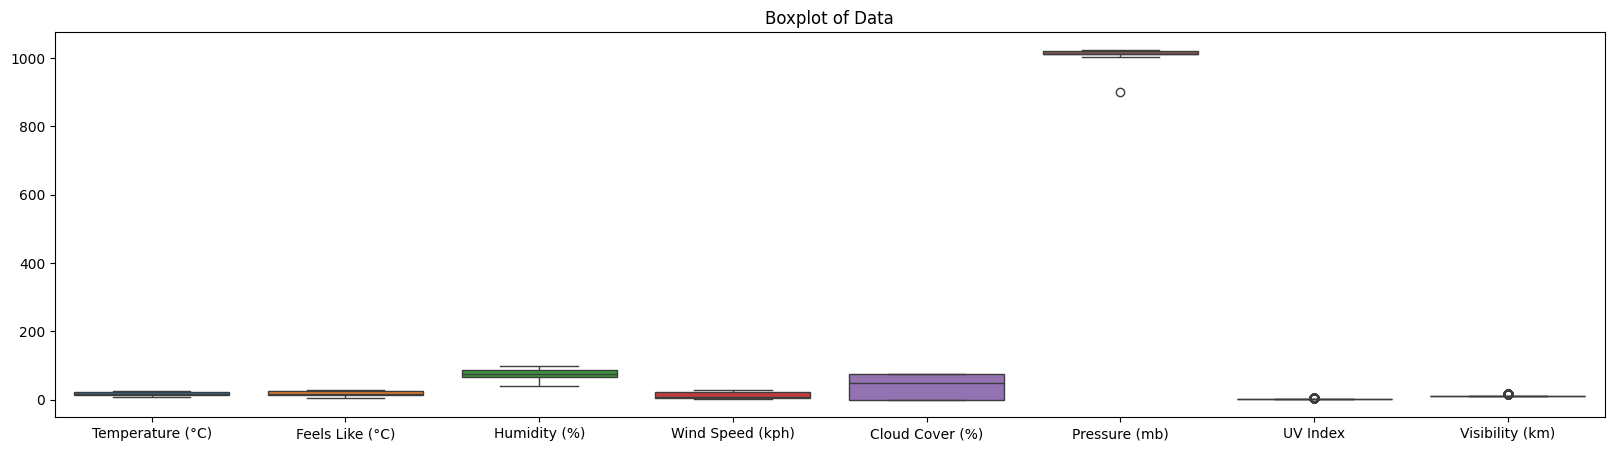

In [37]:
# Spotting outliers: Boxplot

boxplot_data = numeric_data.drop(columns="Location_Index",axis=1)
plt.figure(figsize=(20, 5))
sns.boxplot(data=boxplot_data)
plt.title('Boxplot of Data')
plt.show()

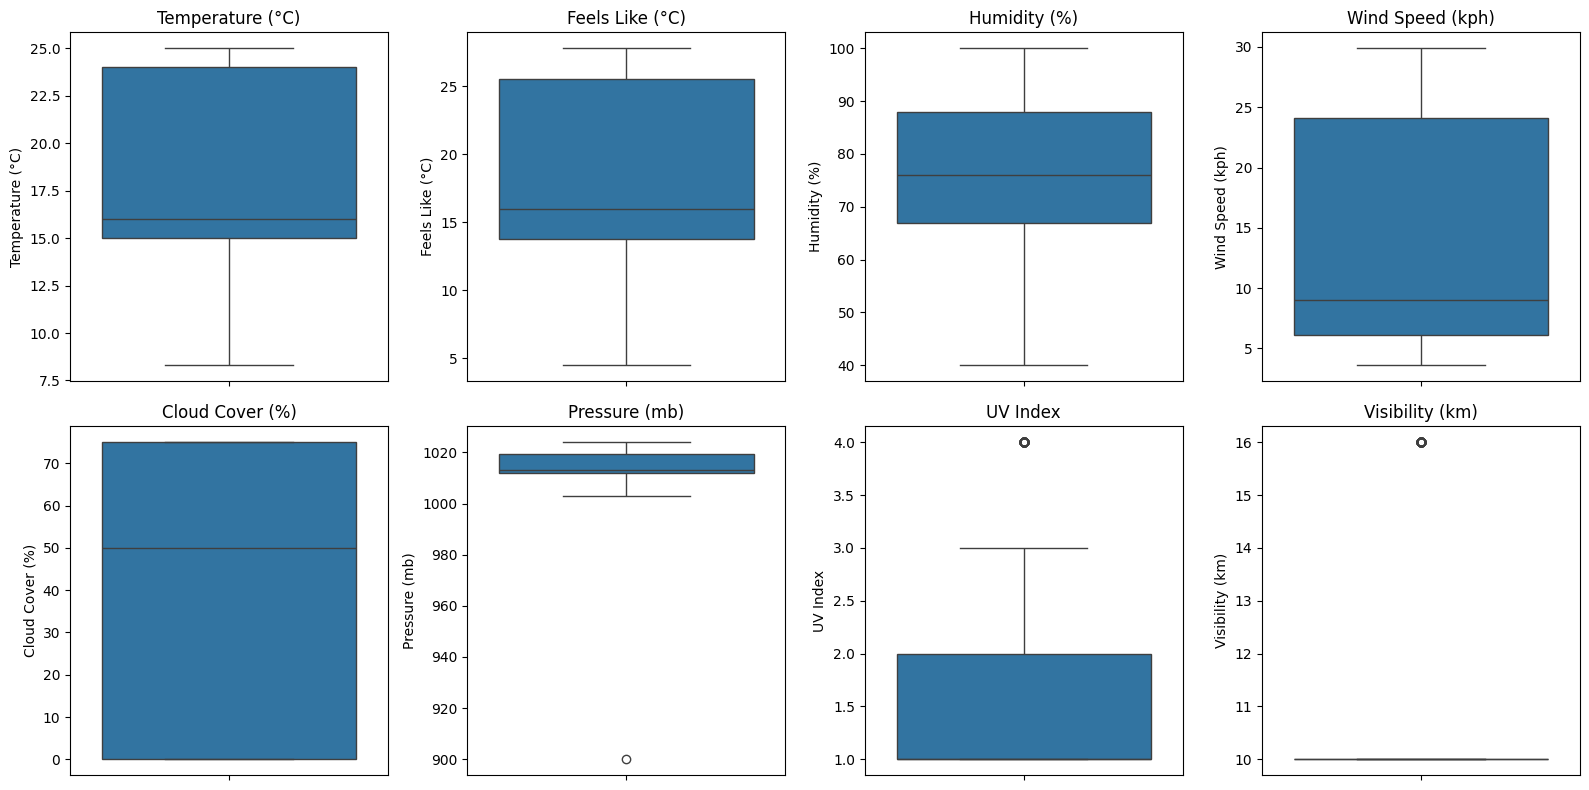

In [19]:

# Spotting outliers: Boxplots

n_cols = 4   
n = len(boxplot_data.columns)
n_rows = int(n / n_cols)

plt.figure(figsize=(n_cols * 4, n_rows * 4))

for i, col in enumerate(boxplot_data.columns, 1): #list(enumerate(...)) returns a list [(0,A), (1,B), (2,C), ...]
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=boxplot_data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [20]:
# There appears to be outliers for pressure, UV-index and visibility (same row?)

<h4>Additional tools for EDA:</h4>

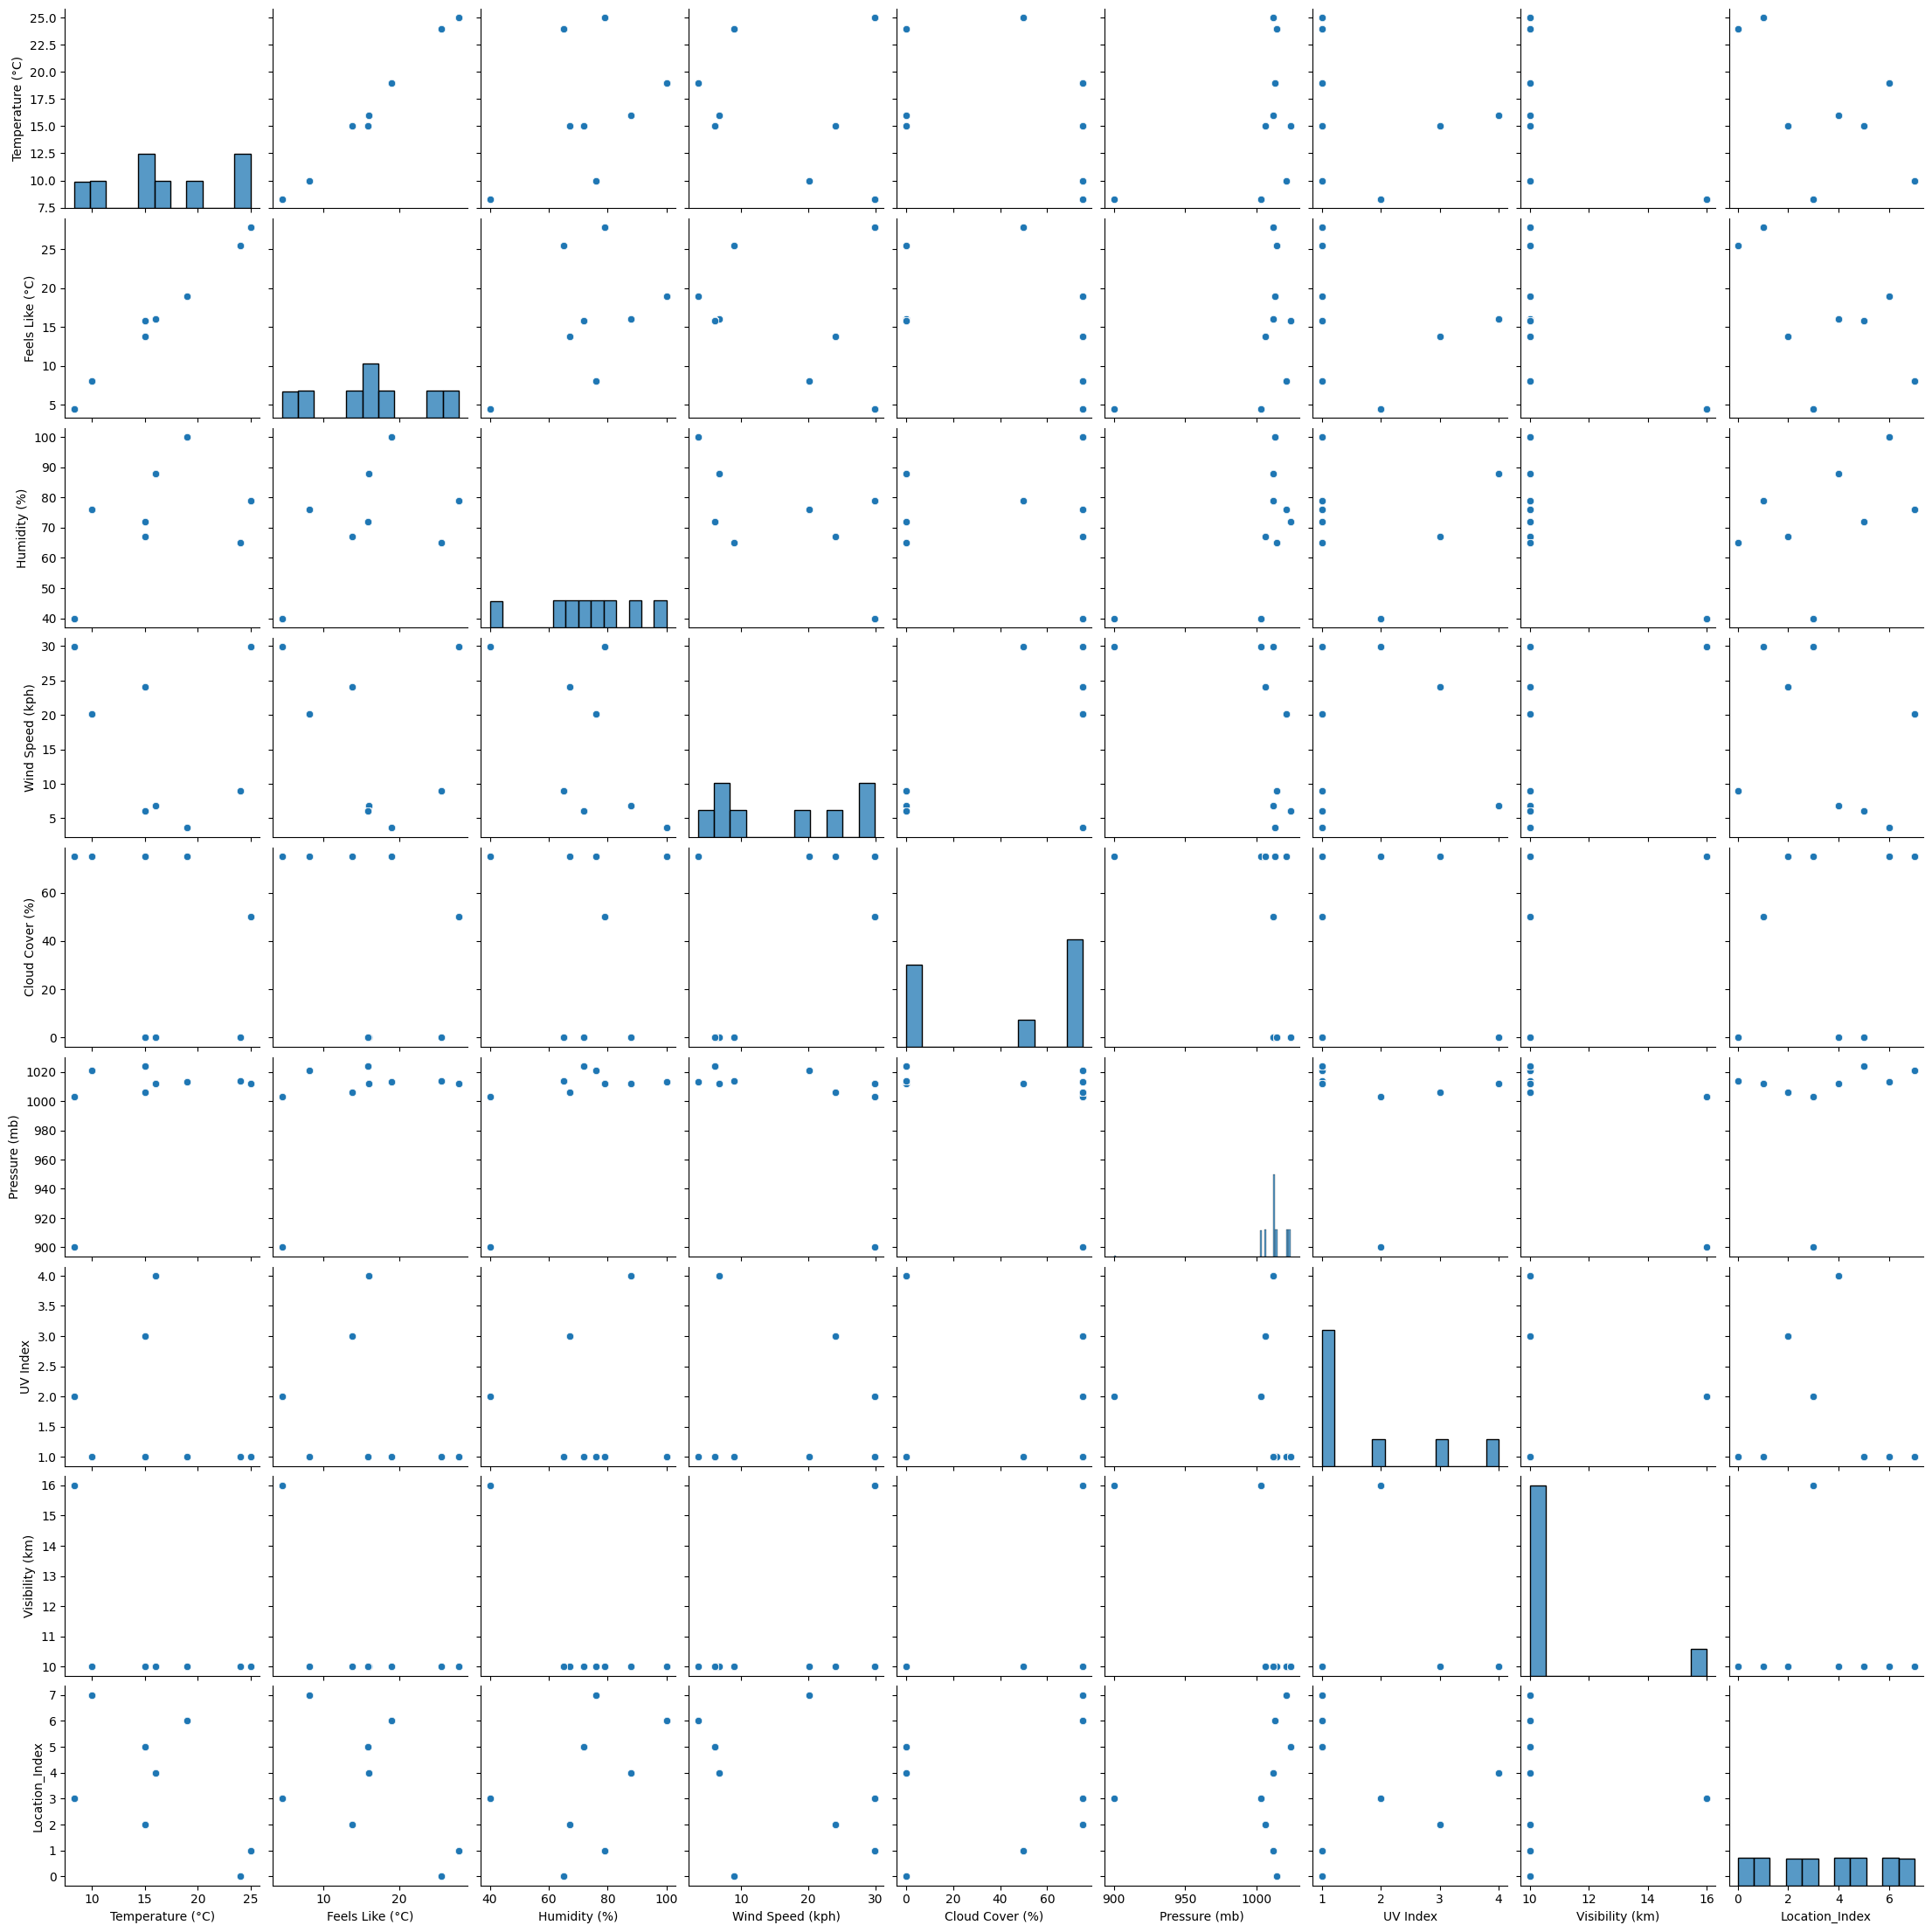

In [21]:
# 1) Scatterplot matrix (pairplot): Shows linear/non-linear relationships between all pairs of variables.

sns.pairplot(numeric_data)
plt.show()

# Useful for:
# spotting curved (non-linear)relationships
# does the data cluster?
# visualising collinearity


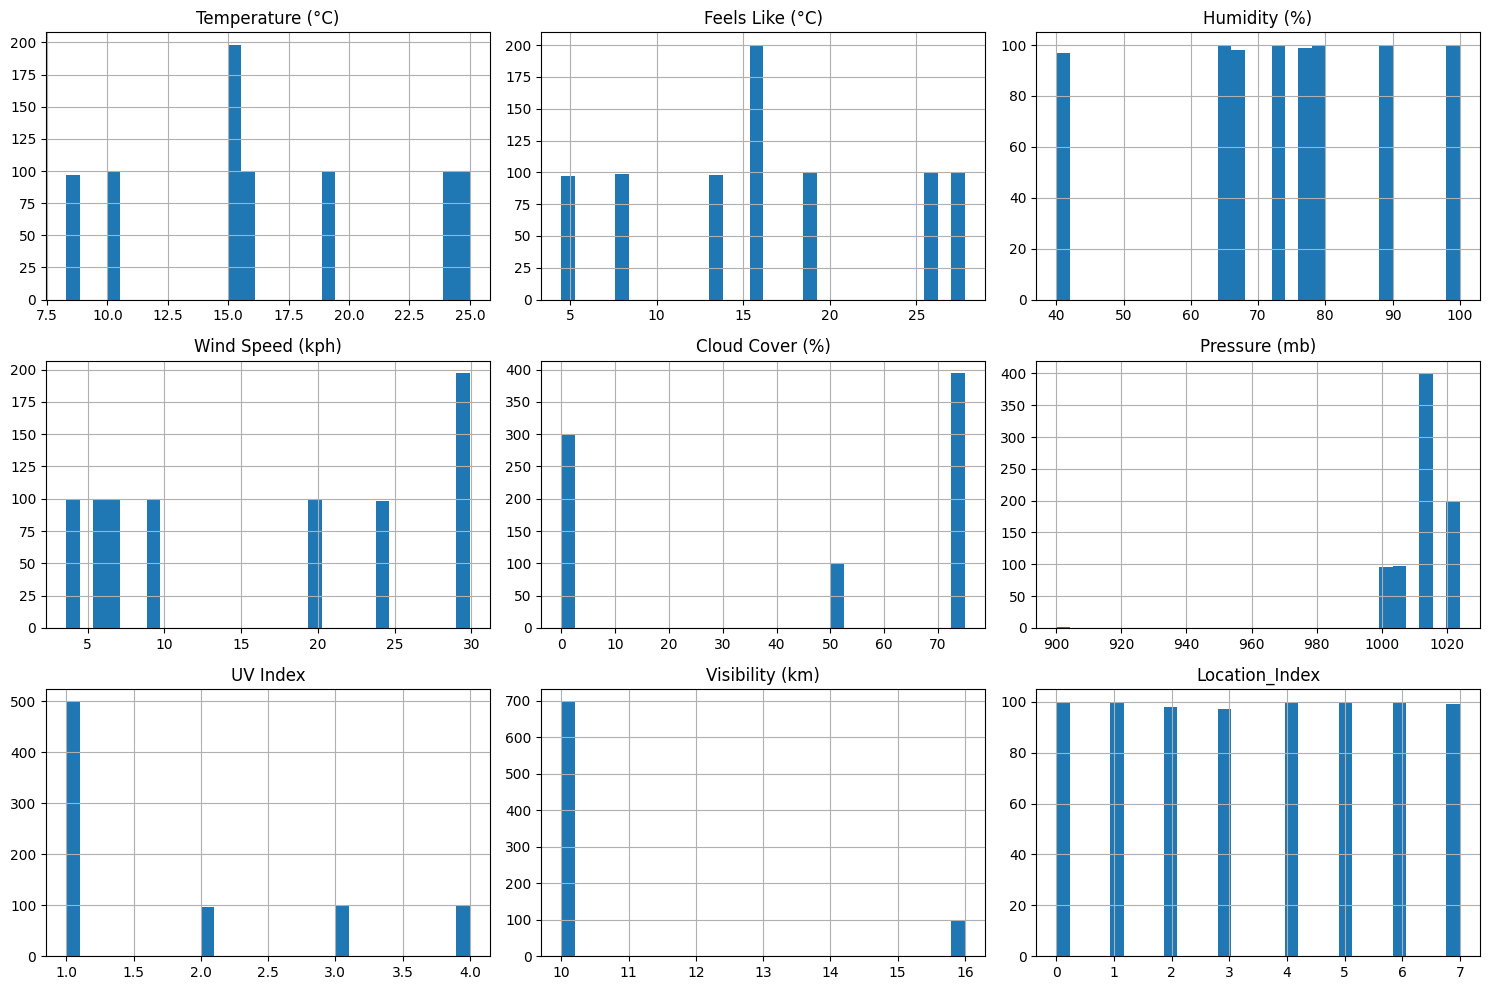

In [ ]:
# 2) Checking distribution (similar to boxplot)

# Histograms:

numeric_data.hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

# (As seen plotted on the diagonal axis of the above scatterplot matrix)

In [23]:
# 3) Further colinearity exploration:

# Variance Inflation Factor (VIF):
#
# Used to measure how much multicollinearity exists among the predictor variables. In simple terms, it tells you how much a 
# variable’s coefficient estimate is being “inflated” because that variable is correlated with other predictors.


# VIF > 5 → moderate multicollinearity
# VIF > 10 → strong collinearity; remove or combine variables

# High VIF means: the predictor doesn’t bring unique information and coefficient estimates become unreliable

#Using the statsmodels library:

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_VIF = numeric_data.drop(columns=['Location_Index']).assign(const=1) #const = 1 creates a column of 1's to add an intercept (needed for VIF)

vif_df = pd.DataFrame({
    "feature": X_VIF.columns,
    "VIF": [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]
})

print(vif_df)

            feature           VIF
0  Temperature (°C)    586.747659
1   Feels Like (°C)    733.972366
2      Humidity (%)     12.153299
3  Wind Speed (kph)     11.397638
4   Cloud Cover (%)     18.491107
5     Pressure (mb)      4.372119
6          UV Index      5.276965
7   Visibility (km)      5.182129
8             const  83985.881785


In [24]:
# Only 3 are 'acceptable', the others are large indicating high collinearity

# When location index is used:
X_VIF = numeric_data.assign(const=1) #const = 1 creates a column of 1's to add an intercept (needed for VIF)

vif_df = pd.DataFrame({
    "feature": X_VIF.columns,
    "VIF": [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]
})

print(vif_df)

            feature       VIF
0  Temperature (°C)       inf
1   Feels Like (°C)       inf
2      Humidity (%)       inf
3  Wind Speed (kph)       inf
4   Cloud Cover (%)       inf
5     Pressure (mb)  4.372119
6          UV Index       inf
7   Visibility (km)       inf
8    Location_Index       inf
9             const  0.000000


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


<h3>Preparing the Data for Modelling</h3>

In [25]:
#Separating the data into predictors (x) and target (y):

X = numeric_data[['Humidity (%)', 'Wind Speed (kph)', 'Pressure (mb)', 'Visibility (km)', 'Location_Index']]
y = numeric_data['Temperature (°C)']

In [26]:
#Scaling the data (linear regression doesn't work well when there are large differences in data)

from sklearn.preprocessing import RobustScaler

# When scaling, best to use RobustScaler() when the data contains outliers. When it doesn't, use StandardScaler()

robust_scaler = RobustScaler()

X_scaled = pd.DataFrame(robust_scaler.fit_transform(X), columns=X.columns)
X_scaled.describe()

,Humidity (%),Wind Speed (kph),Pressure (mb),Visibility (km),Location_Index
count,794.000000,794.000000,794.000000,794.000000,794.000000
mean,-0.118388,0.395739,0.005733,0.732997,-0.104998
std,0.784709,0.574388,1.049442,1.966105,0.483490
min,-1.714286,-0.300000,-15.586207,0.000000,-0.842105
25%,-0.428571,-0.161111,-0.137931,0.000000,-0.631579
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.571429,0.838889,0.862069,0.000000,0.368421
max,1.142857,1.161111,1.517241,6.000000,0.631579


In [27]:
# No need to scale target (y) values

In [28]:
# Splitting the data into training and testing data:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=13)

In [29]:
# Training different linear regression models

from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [32]:
# Training different linear regression models

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


models = {"Linear Regression": LinearRegression(),"Ridge Regression": Ridge(alpha=1.0),"Lasso Regression": Lasso(alpha=0.1)}

performance = {}
predictions={}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = [y_pred]
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    performance[name] = {"MSE": mse, "R² Score": r2}

# Output of performance metrics:
performance = pd.DataFrame(performance).T
performance.head()

,MSE,R² Score
Linear Regression,2.105695,0.934119
Ridge Regression,2.165223,0.932257
Lasso Regression,2.748723,0.914001


In [ ]:
#Differences between the models:


# Simple linear regression (SLR) fits a model by minimising the sum of squared errors without any regularisation, 
# which makes it easy to interpret, but sensitive to multicollinearity and overfitting. 
# 
# Ridge regression (L2 regularisation) adds a penalty on the squared magnitude of coefficients, shrinking them toward zero 
#  without eliminating any predictors; this stabilises the model and handles multicollinearity well. 
# 
# Lasso regression (L1 regularisation) applies a penalty on the absolute value of coefficients, 
# which not only shrinks them but can force some coefficients to become exactly zero, making it useful for automatic feature selection. 




# Ridge is best for reducing coefficient variance, Lasso for selecting important features, and SLR for simple,
# interpretable models when predictors are not strongly correlated.

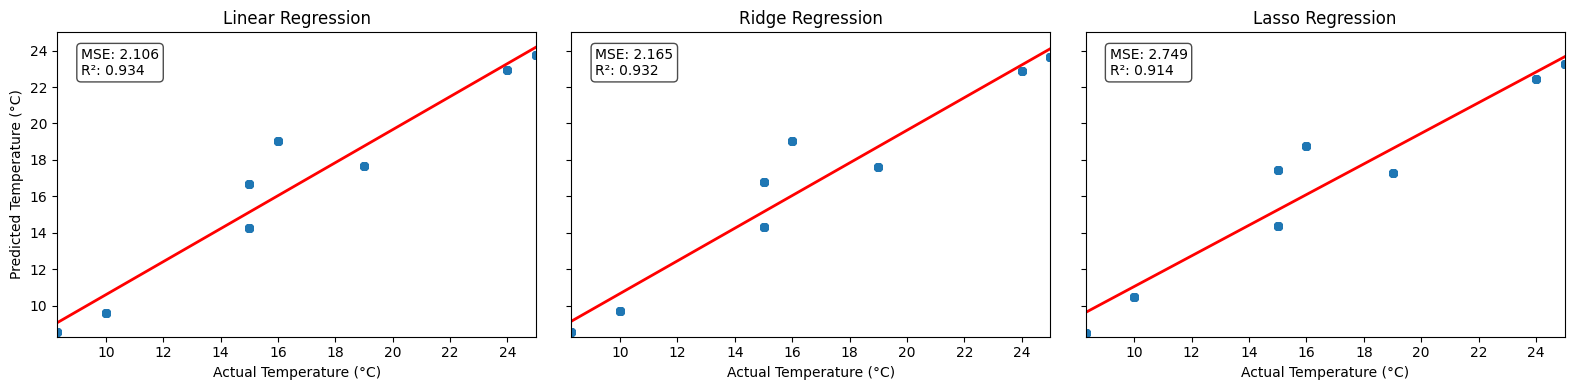

In [34]:
# Predicted vs Actual scatter plots with best-fit lines and performance labels
fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharex=True, sharey=True)

model_names = list(models.keys())

# Prepare global limits for consistent axes across plots
pred_arrays = []
for mn in model_names:
    preds = predictions[mn]
    y_pred = np.asarray(preds[0]) if isinstance(preds, list) else np.asarray(preds)
    pred_arrays.append(y_pred)

all_vals_min = min(y_test.min(), *(p.min() for p in pred_arrays))
all_vals_max = max(y_test.max(), *(p.max() for p in pred_arrays))

for ax, mn, y_pred in zip(axes, model_names, pred_arrays):
    sns.regplot(
        x=y_test.values,
        y=y_pred,
        ax=ax,
        ci=None,
        scatter_kws={"alpha": 0.6, "s": 30},
        line_kws={"color": "red", "lw": 2},
    )
    ax.set_title(mn)
    ax.set_xlim(all_vals_min, all_vals_max)
    ax.set_ylim(all_vals_min, all_vals_max)
    ax.set_xlabel("Actual Temperature (°C)")
    if ax is axes[0]:
        ax.set_ylabel("Predicted Temperature (°C)")
    else:
        ax.set_ylabel("")

    # Add performance metrics
    mse_val = performance.loc[mn, "MSE"]
    r2_val = performance.loc[mn, "R² Score"]
    ax.text(
        0.05,
        0.95,
        f"MSE: {mse_val:.3f}\nR²: {r2_val:.3f}",
        transform=ax.transAxes,
        va="top",
        ha="left",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.7),
    )

plt.tight_layout()
plt.show()

<h3>Extra:</h3>

In [ ]:
# Based on the colinearity metric VIF explored above, what would happen to the perfomrance of the model if high VIF score
# variables were included/excluded?

In [49]:
# A reminder of the VIF scores:
X_VIF = numeric_data.drop(columns=['Location_Index']).assign(const=1) #const = 1 creates a column of 1's to add an intercept (needed for VIF)

vif_df = pd.DataFrame({
    "feature": X_VIF.columns,
    "VIF": [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]
})

print(vif_df)

            feature           VIF
0  Temperature (°C)    586.747659
1   Feels Like (°C)    733.972366
2      Humidity (%)     12.153299
3  Wind Speed (kph)     11.397638
4   Cloud Cover (%)     18.491107
5     Pressure (mb)      4.372119
6          UV Index      5.276965
7   Visibility (km)      5.182129
8             const  83985.881785


In [54]:
# Let's carry out the modelling to now include 'Feels Like (°C)' (Temperature VIF score is high but this is our target variable anyway)
# (Feels Like (°C) was excluded before):

vif_X = numeric_data[['Feels Like (°C)','Humidity (%)', 'Wind Speed (kph)', 'Pressure (mb)', 'Visibility (km)', 'Location_Index']]
vif_y = numeric_data['Temperature (°C)']

vif_X_scaled = pd.DataFrame(robust_scaler.fit_transform(vif_X), columns=vif_X.columns)
vif_X_train, vif_X_test, vif_y_train, vif_y_test = train_test_split(vif_X_scaled, vif_y, test_size=0.2, random_state=13)

models = {"Linear Regression": LinearRegression(),"Ridge Regression": Ridge(alpha=1.0),"Lasso Regression": Lasso(alpha=0.1)}

vif_performance = {}
vif_predictions={}

for name, model in models.items():
    model.fit(vif_X_train, vif_y_train)
    vif_y_pred = model.predict(vif_X_test)
    vif_predictions[name] = [vif_y_pred]
    mse = mean_squared_error(vif_y_test, vif_y_pred)
    r2 = r2_score(vif_y_test, vif_y_pred)
    vif_performance[name] = {"MSE": mse, "R² Score": r2}

# Output of performance metrics:
vif_performance = pd.DataFrame(vif_performance).T
vif_performance.head()

,MSE,R² Score
Linear Regression,0.140568,0.995602
Ridge Regression,0.143259,0.995518
Lasso Regression,0.185114,0.994208


In [56]:
# compared to excluding 'Feels Like (C)':
performance.head()

,MSE,R² Score
Linear Regression,2.105695,0.934119
Ridge Regression,2.165223,0.932257
Lasso Regression,2.748723,0.914001


In [57]:
# Seems to be more accurate to include it...